# Importing all important packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the dataset

In [3]:
df = pd.read_csv('pokemon_data.csv')
df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Basic analysis before changing dataframe

In [4]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


# Changing the Index

In [5]:
df = df.set_index('Name')

In [6]:
df.tail(5)

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Diancie,719,Rock,Fairy,600,50,100,150,100,150,50,6,True
DiancieMega Diancie,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True
HoopaHoopa Unbound,720,Psychic,Dark,680,80,160,60,170,130,80,6,True
Volcanion,721,Fire,Water,600,80,110,120,130,90,70,6,True


# Change column names to upper case 

In [7]:
df.columns = df.columns.str.upper().str.replace(' ', '_')

In [8]:
df.head(5)

,#,TYPE_1,TYPE_2,TOTAL,HP,ATTACK,DEFENSE,SP._ATK,SP._DEF,SPEED,GENERATION,LEGENDARY
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False


# Delete TOTAL column, recalculate and enter the column in the end

In [11]:
df = df.drop(['TOTAL'], axis=1)

In [12]:
df.head(5)

,#,TYPE_1,TYPE_2,HP,ATTACK,DEFENSE,SP._ATK,SP._DEF,SPEED,GENERATION,LEGENDARY
Name,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,39,52,43,60,50,65,1,False


In [13]:
df['TOTAL'] = df['HP'] + df['DEFENSE'] + df['ATTACK'] + df['SP._DEF'] + df['SP._ATK'] + df['SPEED']

In [14]:
df.head(5)

,#,TYPE_1,TYPE_2,HP,ATTACK,DEFENSE,SP._ATK,SP._DEF,SPEED,GENERATION,LEGENDARY,TOTAL
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,45,49,49,65,65,45,1,False,318
Ivysaur,2,Grass,Poison,60,62,63,80,80,60,1,False,405
Venusaur,3,Grass,Poison,80,82,83,100,100,80,1,False,525
VenusaurMega Venusaur,3,Grass,Poison,80,100,123,122,120,80,1,False,625
Charmander,4,Fire,NaN,39,52,43,60,50,65,1,False,309


# Removed all the text before "Mega" in the index

In [15]:
df.index = df.index.str.replace('.*(?=Mega)','')

In [16]:
df.head(5)

,#,TYPE_1,TYPE_2,HP,ATTACK,DEFENSE,SP._ATK,SP._DEF,SPEED,GENERATION,LEGENDARY,TOTAL
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,45,49,49,65,65,45,1,False,318
Ivysaur,2,Grass,Poison,60,62,63,80,80,60,1,False,405
Venusaur,3,Grass,Poison,80,82,83,100,100,80,1,False,525
Mega Venusaur,3,Grass,Poison,80,100,123,122,120,80,1,False,625
Charmander,4,Fire,NaN,39,52,43,60,50,65,1,False,309


# rename # column to Pokedex index

In [19]:
df['POKEDEX'] = df['#']

In [20]:
df = df.drop(['#'], axis = 1)
df.head(5)

,TYPE_1,TYPE_2,HP,ATTACK,DEFENSE,SP._ATK,SP._DEF,SPEED,GENERATION,LEGENDARY,TOTAL,POKEDEX
Name,,,,,,,,,,,,
Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,1
Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405,2
Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525,3
Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625,3
Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309,4


# Rearange columns

In [28]:
cols = df.columns.to_list()
cols = [cols[11] , cols[0] , cols[1] , cols[10] , cols[2], cols[3], cols[4], cols[5], cols[6], cols[7], cols[8], cols[9]]
df = df[cols]

In [29]:
df.head(5)

,POKEDEX,TYPE_1,TYPE_2,TOTAL,HP,ATTACK,DEFENSE,SP._ATK,SP._DEF,SPEED,GENERATION,LEGENDARY
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False


# Replace NaN of type 2 with coresponding type 1

In [35]:
df['TYPE_2'].fillna(df['TYPE_1'], inplace=True)
df.head(10)

,POKEDEX,TYPE_1,TYPE_2,TOTAL,HP,ATTACK,DEFENSE,SP._ATK,SP._DEF,SPEED,GENERATION,LEGENDARY
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,Fire,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,Fire,405,58,64,58,80,65,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
Mega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
Mega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False


# Replcace . (dot) in SP attack and SP def 

In [36]:
df.columns = df.columns.str.replace('.', '')

In [37]:
df.tail(5)

,POKEDEX,TYPE_1,TYPE_2,TOTAL,HP,ATTACK,DEFENSE,SP_ATK,SP_DEF,SPEED,GENERATION,LEGENDARY
Name,,,,,,,,,,,,
Diancie,719,Rock,Fairy,600,50,100,150,100,150,50,6,True
Mega Diancie,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True
HoopaHoopa Unbound,720,Psychic,Dark,680,80,160,60,170,130,80,6,True
Volcanion,721,Fire,Water,600,80,110,120,130,90,70,6,True


# Filtering examples

In [49]:
df[df['LEGENDARY'] == True].sort_values(by='TOTAL', ascending = False).head(10)        
#ALL LEGENDARY POKEMON SORTED BY TOTAL

,POKEDEX,TYPE_1,TYPE_2,TOTAL,HP,ATTACK,DEFENSE,SP_ATK,SP_DEF,SPEED,GENERATION,LEGENDARY
Name,,,,,,,,,,,,
Mega Mewtwo X,150,Psychic,Fighting,780,106,190,100,154,100,130,1,True
Mega Mewtwo Y,150,Psychic,Psychic,780,106,150,70,194,120,140,1,True
Mega Rayquaza,384,Dragon,Flying,780,105,180,100,180,100,115,3,True
KyogrePrimal Kyogre,382,Water,Water,770,100,150,90,180,160,90,3,True
GroudonPrimal Groudon,383,Ground,Fire,770,100,180,160,150,90,90,3,True
Arceus,493,Normal,Normal,720,120,120,120,120,120,120,4,True
KyuremBlack Kyurem,646,Dragon,Ice,700,125,170,100,120,90,95,5,True
Mega Latias,380,Dragon,Psychic,700,80,100,120,140,150,110,3,True
KyuremWhite Kyurem,646,Dragon,Ice,700,125,120,90,170,100,95,5,True


In [50]:
df[(df['TYPE_1'] == 'Dragon') | (df['TYPE_2'] == 'Dragon')].sort_values(by='TOTAL', ascending = False).head(10)
#ALL DRAGONS SORTED BY TOTAL

,POKEDEX,TYPE_1,TYPE_2,TOTAL,HP,ATTACK,DEFENSE,SP_ATK,SP_DEF,SPEED,GENERATION,LEGENDARY
Name,,,,,,,,,,,,
Mega Rayquaza,384,Dragon,Flying,780,105,180,100,180,100,115,3,True
Mega Latias,380,Dragon,Psychic,700,80,100,120,140,150,110,3,True
KyuremWhite Kyurem,646,Dragon,Ice,700,125,120,90,170,100,95,5,True
KyuremBlack Kyurem,646,Dragon,Ice,700,125,170,100,120,90,95,5,True
Mega Garchomp,445,Dragon,Ground,700,108,170,115,120,95,92,4,False
Mega Latios,381,Dragon,Psychic,700,80,130,100,160,120,110,3,True
Mega Salamence,373,Dragon,Flying,700,95,145,130,120,90,120,3,False
Dialga,483,Steel,Dragon,680,100,120,120,150,100,90,4,True
Zekrom,644,Dragon,Electric,680,100,150,120,120,100,90,5,True


In [58]:
# Locate different max values
print("MAx HP:",(df['HP']).idxmax())
print("MAx TOTAL:",(df['TOTAL']).idxmax())
print("MAx SPEED:",(df['SPEED']).idxmax())

MAx HP: Blissey
MAx TOTAL: Mega Mewtwo X
MAx SPEED: DeoxysSpeed Forme


# Unique Values 

In [59]:
print(df['TYPE_1'].unique())

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


In [61]:
print(df['TYPE_1'].nunique())        #number of uniques

18


# Group by and count uniques example

In [63]:
df.groupby(['TYPE_1']).size()       #First way

TYPE_1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
dtype: int64

In [65]:
df['TYPE_1'].value_counts()        #Second way, sorted automatically

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: TYPE_1, dtype: int64

# How many pokemon each generation

In [68]:
df['GENERATION'].value_counts()           

1    166
5    165
3    160
4    121
2    106
6     82
Name: GENERATION, dtype: int64

# Visualization

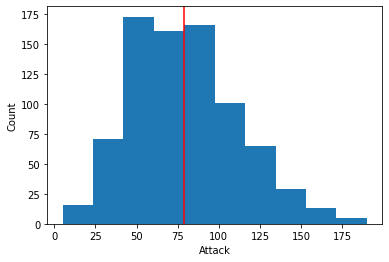

In [79]:
plt.hist(df["ATTACK"],rwidth=1);
plt.xlabel('Attack')
plt.ylabel('Count')
plt.axvline(df['ATTACK'].mean(),linestyle= '-',color='r');

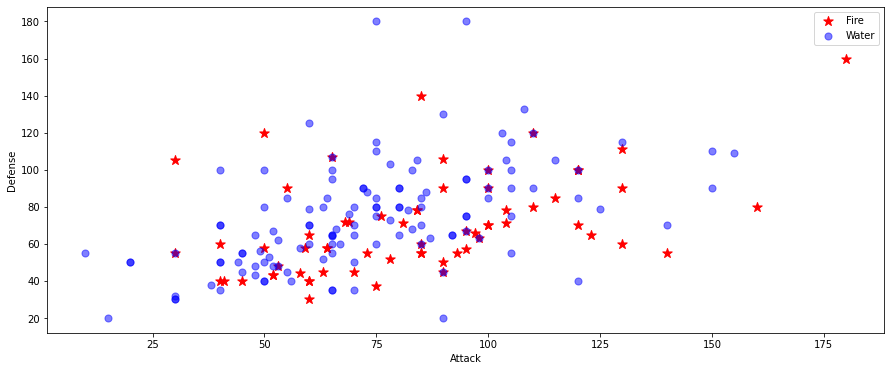

In [103]:
plt.scatter(df[(df['TYPE_1'] == 'Fire') | (df['TYPE_2'] == 'Fire')].ATTACK,
            df[(df['TYPE_1'] == 'Fire') | (df['TYPE_2'] == 'Fire')].DEFENSE,
            color = 'r',
            marker = '*',
            label = 'Fire',
            alpha = 1,
            s=100)
plt.scatter(df[(df['TYPE_1'] == 'Water') | (df['TYPE_2'] == 'Water')].ATTACK,
            df[(df['TYPE_1'] == 'Water') | (df['TYPE_2'] == 'Water')].DEFENSE,
            color = 'b',
            marker = 'o',
            label = 'Water',
            alpha =.5,
            s=50)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend()
plt.gcf().set_size_inches(15,6)

In [106]:
strong = df.sort_values(by = 'TOTAL', ascending = False) #sorting the rows in descending order
strong.drop_duplicates(subset = ['TYPE_1'], keep = 'first') #since the rows are now sorted in descending oredr

,POKEDEX,TYPE_1,TYPE_2,TOTAL,HP,ATTACK,DEFENSE,SP_ATK,SP_DEF,SPEED,GENERATION,LEGENDARY
Name,,,,,,,,,,,,
Mega Rayquaza,384,Dragon,Flying,780,105,180,100,180,100,115,3,True
Mega Mewtwo Y,150,Psychic,Psychic,780,106,150,70,194,120,140,1,True
KyogrePrimal Kyogre,382,Water,Water,770,100,150,90,180,160,90,3,True
GroudonPrimal Groudon,383,Ground,Fire,770,100,180,160,150,90,90,3,True
Arceus,493,Normal,Normal,720,120,120,120,120,120,120,4,True
Mega Metagross,376,Steel,Psychic,700,80,145,150,105,110,110,3,False
Mega Tyranitar,248,Rock,Dark,700,100,164,150,95,120,71,2,False
GiratinaOrigin Forme,487,Ghost,Dragon,680,150,120,100,120,100,90,4,True
Ho-oh,250,Fire,Flying,680,106,130,90,110,154,90,2,True


In [133]:
type1_size = df['TYPE_1'].value_counts()
type2_size = df['TYPE_2'].value_counts()

In [144]:
fig = plt.figure(figsize=(18,15), dpi=1600)
ax1 = plt.subplot2grid((2,4),(0,0))
labels1 = type1_size.index
explode1 = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 
          0, 0, 0, 0, 0, 0, 0, 0, 0, ]
plt.pie(type1_size, labels = labels1, explode = explode1, autopct='%1.1f%%');
plt.title('TYPE 1')

ax1 = plt.subplot2grid((2, 4), (0, 1))
labels2 = type2_size.index
explode2 = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 
          0, 0, 0, 0, 0, 0, 0, 0, 0, ]
plt.pie(type2_size, labels = labels2, explode = explode2, autopct='%1.1f%%');
plt.title('TYPE 2')


Text(0.5, 1.0, 'TYPE 2')